In [3]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
import shapely.geometry as geom
import osmnx as ox

# Transit

## All bus stations in San FRancisco

In [4]:

place_query = {'city':'San Francisco', 'state':'California', 'country':'USA'}
G = ox.graph_from_place(place_query, network_type='drive')
nodes, edges = ox.graph_to_gdfs(G)
# get the geometry data of sna francisco.

scenic = pd.read_csv("top scenic of san francisco.csv",  encoding = "ISO-8859-1")
lnglat = [geom.Point(x) for x in zip(scenic.lon, scenic.lat)]
scenic = gpd.GeoDataFrame(scenic, geometry = lnglat)
location = [(x) for x in zip(scenic.lon, scenic.lat)]
# get the geometry data of the most popular 10 scenics of San Francisco.

stop = gpd.read_file("MUNI Transit Stops/geo_export_62f191e6-0579-4c3c-8acb-13e97b369603.shp")
stop = stop.iloc[:,[15,11,16,24,25]]
# get the geometry data of bus stations of San Francisco 


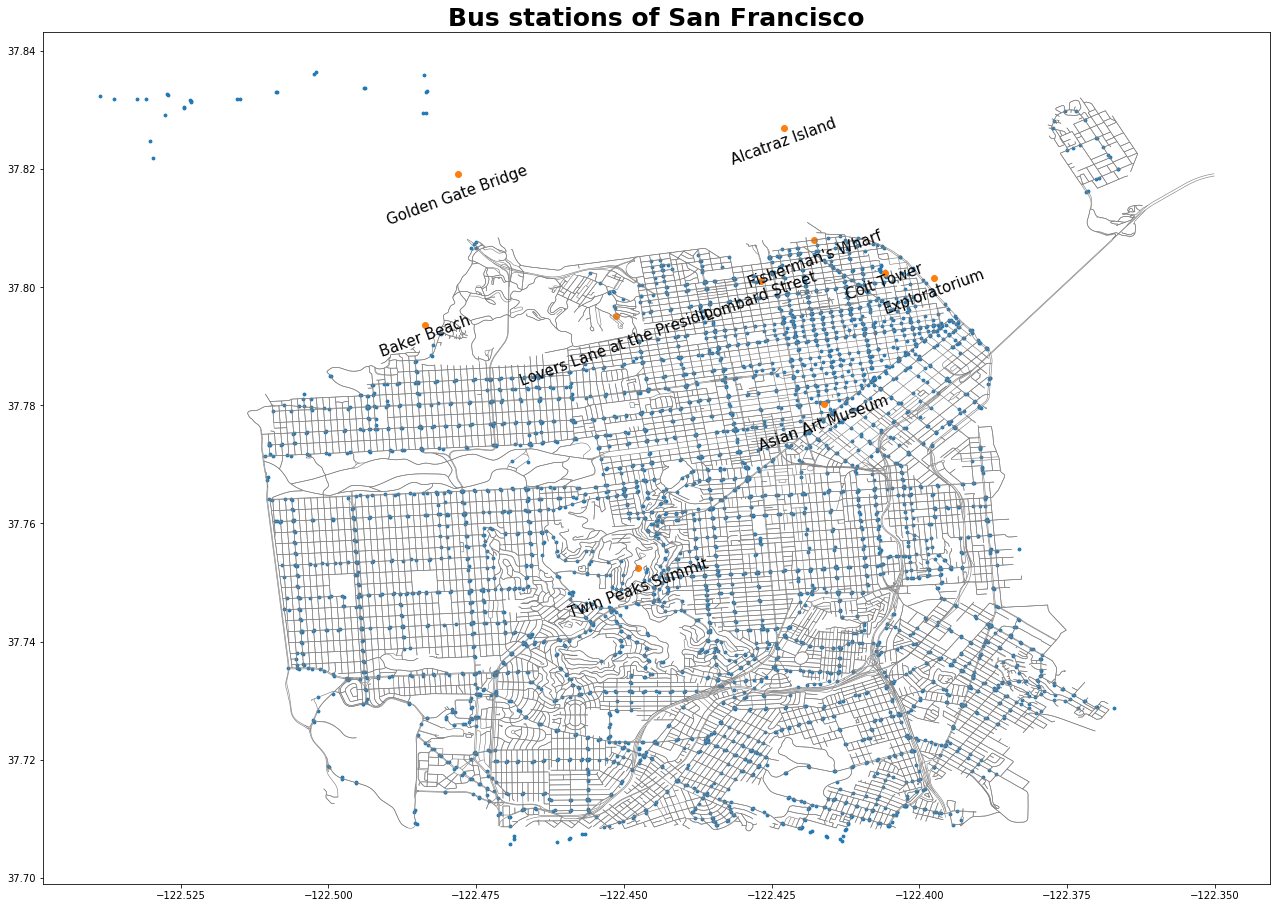

In [4]:
sanfranplot = edges.plot(color = 'grey',linewidth = 0.6, figsize = (22,22))

stopplot = stop.plot(ax = sanfranplot, markersize = 8)

sanfranplot.set_title('Bus stations of San Francisco', fontsize=25, fontweight='bold')

scenicplot = scenic.plot(ax = sanfranplot)
#routeplot.legend(loc = 'center left', bbox_to_anchor = (0.2,1.12), ncol = 3)

for i in range(len(location)):
    
    sanfranplot.annotate(scenic.iloc[i,0], xy = location[i], horizontalalignment = "center", fontsize=15,  rotation=20)
# Call add_label() on each row.

plt.show()


## Bus stations near the viewpoints

In [8]:
#2. distance function

#a.) define a distance function
import numpy as np

def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)

    All args must be of equal length.    

    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2

    c = 2 * np.arcsin(np.sqrt(a))
    km = 6367 * c
    return km

In [6]:
def nearest_stop(data):
    lat1 = data[1]
    lon1 = data[2]
    distance = []
    for i in range(len(stop)):
        lat2 = stop.iloc[i,2]
        lon2 = stop.iloc[i,3]
        dis = haversine_np(lon1, lat1, lon2, lat2)
        distance.append(dis)
    stopdis = pd.DataFrame(columns = ['stop', 'dist','geometry','latitude','longitude'])
    stopdis['stop'] = stop['stopname']
    stopdis['geometry'] = stop['geometry']
    stopdis['dist'] = distance
    stopdis['latitude'] = stop['latitude']
    stopdis['longitude'] = stop['longitude']
    nearest  = stopdis.sort_values(by = 'dist', ascending = True)[0:10]
    nearestgpd = gpd.GeoDataFrame(nearest, geometry = nearest['geometry'])
    name = nearest['stop']
    nearestlocation = [(x) for x in zip(nearest.longitude, nearest.latitude)]
    sanfranplot = edges.plot(color = 'grey',linewidth = 0.6, figsize = (15,15))
    sanfranplot.set_title('The nearest bus stations of viewpoints', fontsize=25, fontweight='bold')
    #nearestplot = nearestgpd.plot(ax = sanfranplot, markersize = 8 )
    nearestplot = nearestgpd.plot(ax = sanfranplot,column = 'stop', alpha = 1,legend = True)
    #routeplot.legend(loc = 'center left', bbox_to_anchor = (0.2,1.12), ncol = 3)
    scenicplot = scenic.plot(ax = sanfranplot, markersize = 120)

    xmax = min((max(nearest.longitude)),-122.32)
    xmin = max((min(nearest.longitude)),-122.53)
    ymax = min((max(nearest.latitude)),37.84)
    ymin = max((min(nearest.latitude)),37.7)
    sanfranplot.set_xlim([xmin-0.0015, xmax+0.0015])
    sanfranplot.set_ylim([ymin-0.0015, ymax+0.0015])
    #sanfranplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    for i in range(len(location)):
        sanfranplot.annotate(scenic.iloc[i,0], xy = location[i], horizontalalignment = "center", fontsize=20,  rotation=0)
        # Call add_label() on each row.
    #for i in range(len(nearestlocation)):
     #   sanfranplot.annotate(nearest.iloc[i,0], xy = nearestlocation[i], horizontalalignment = "center", fontsize=8,  rotation=30)
    plt.show()


    

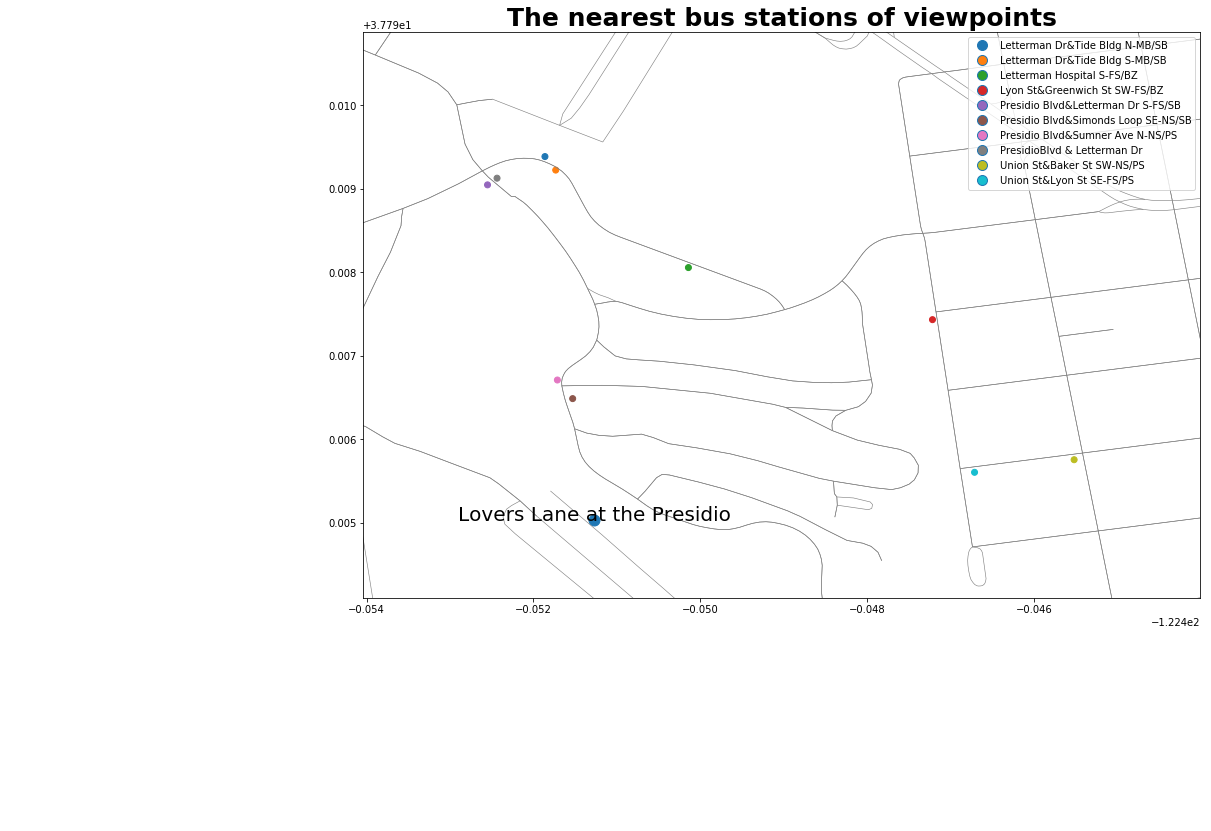

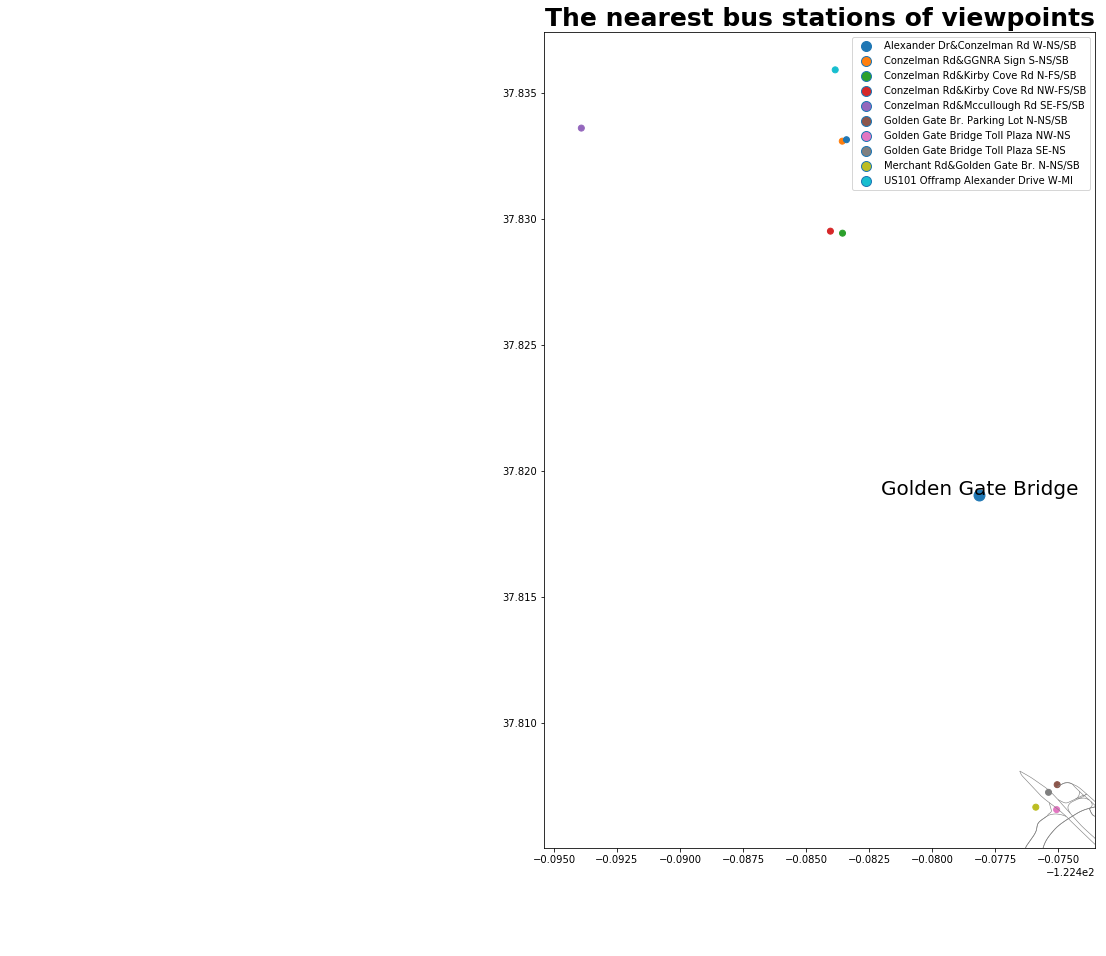

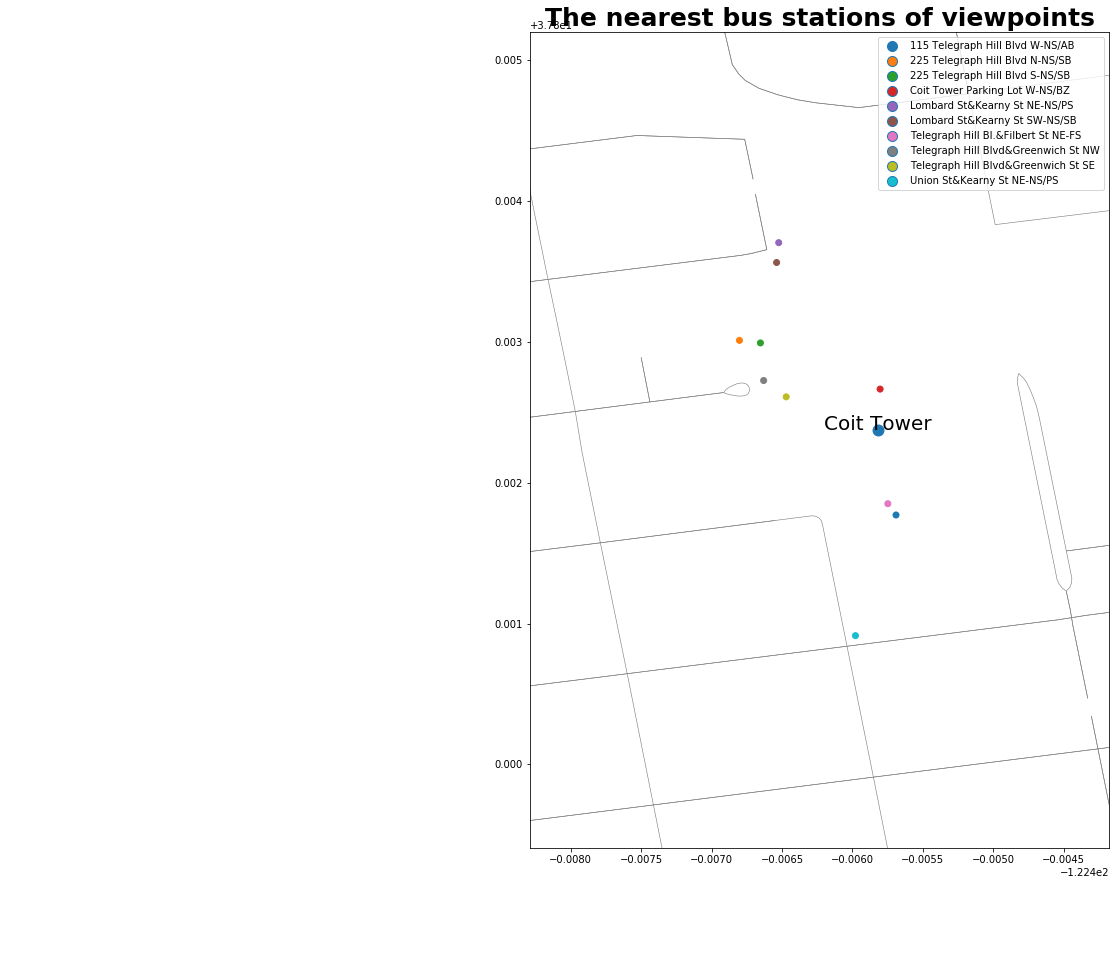

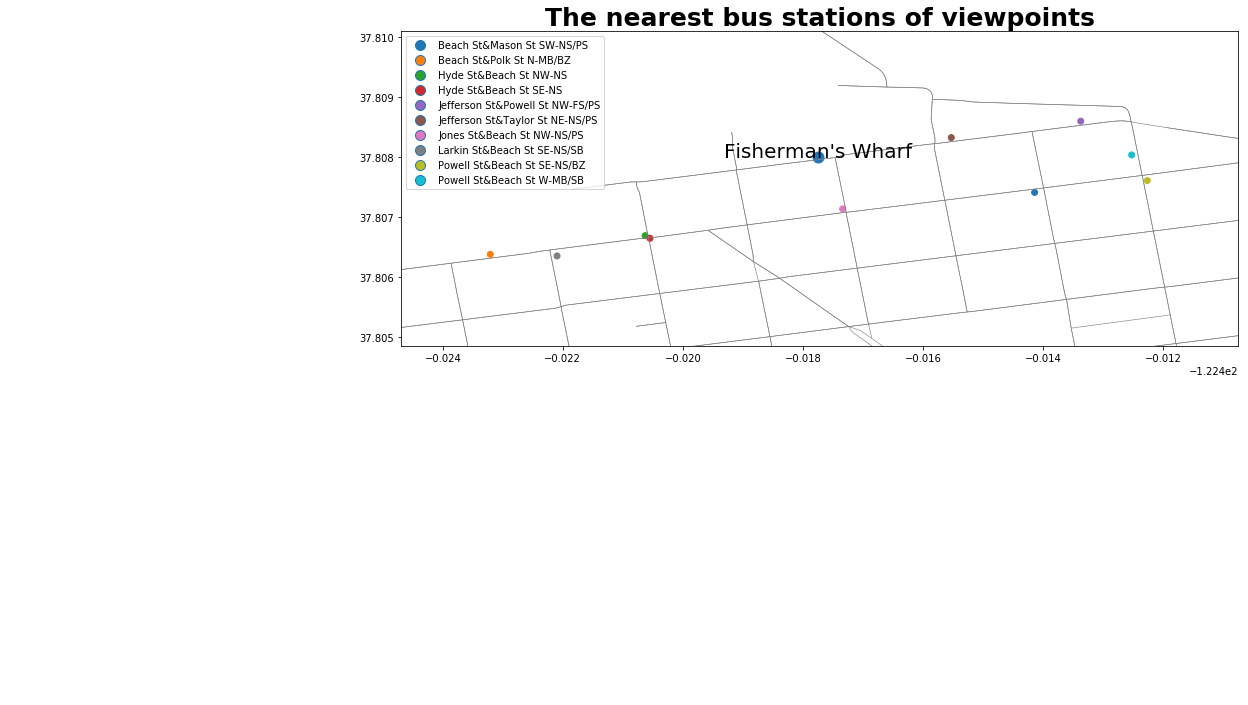

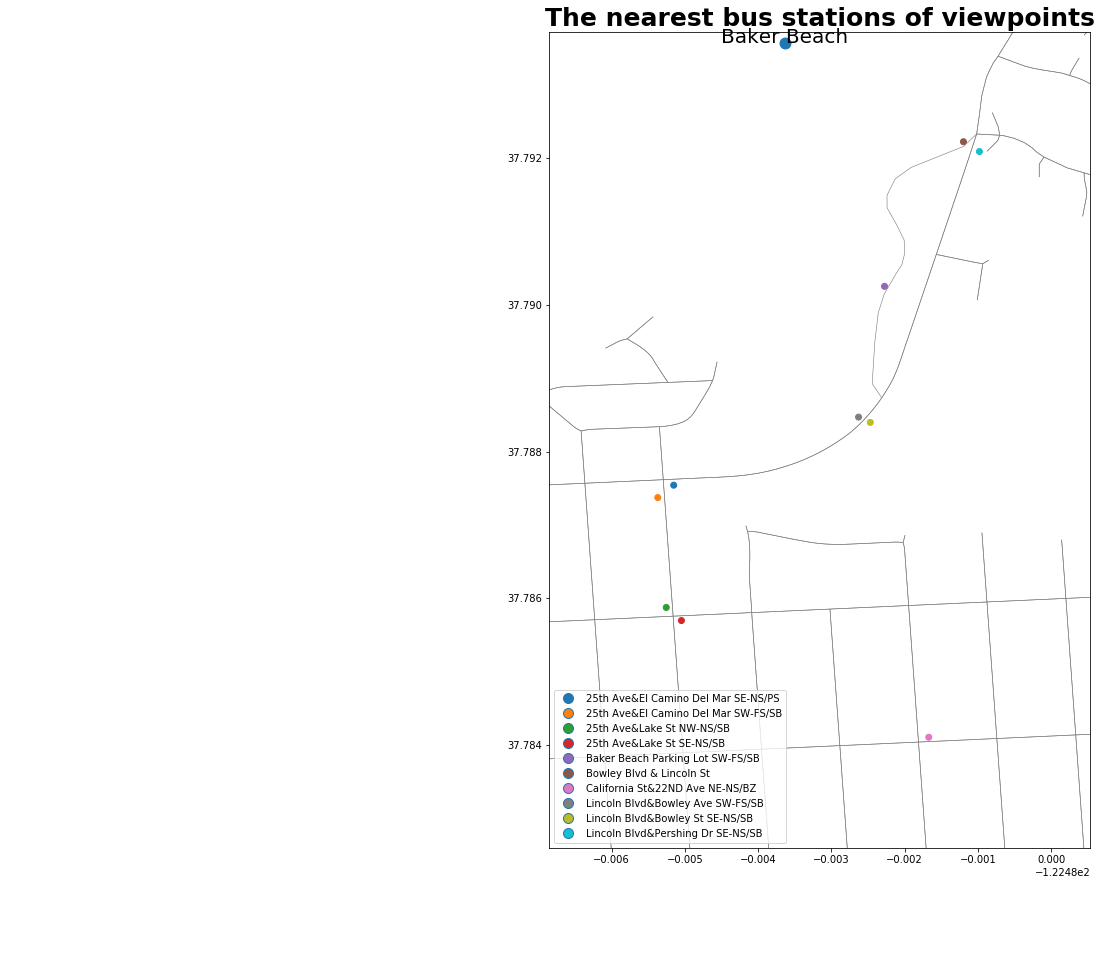

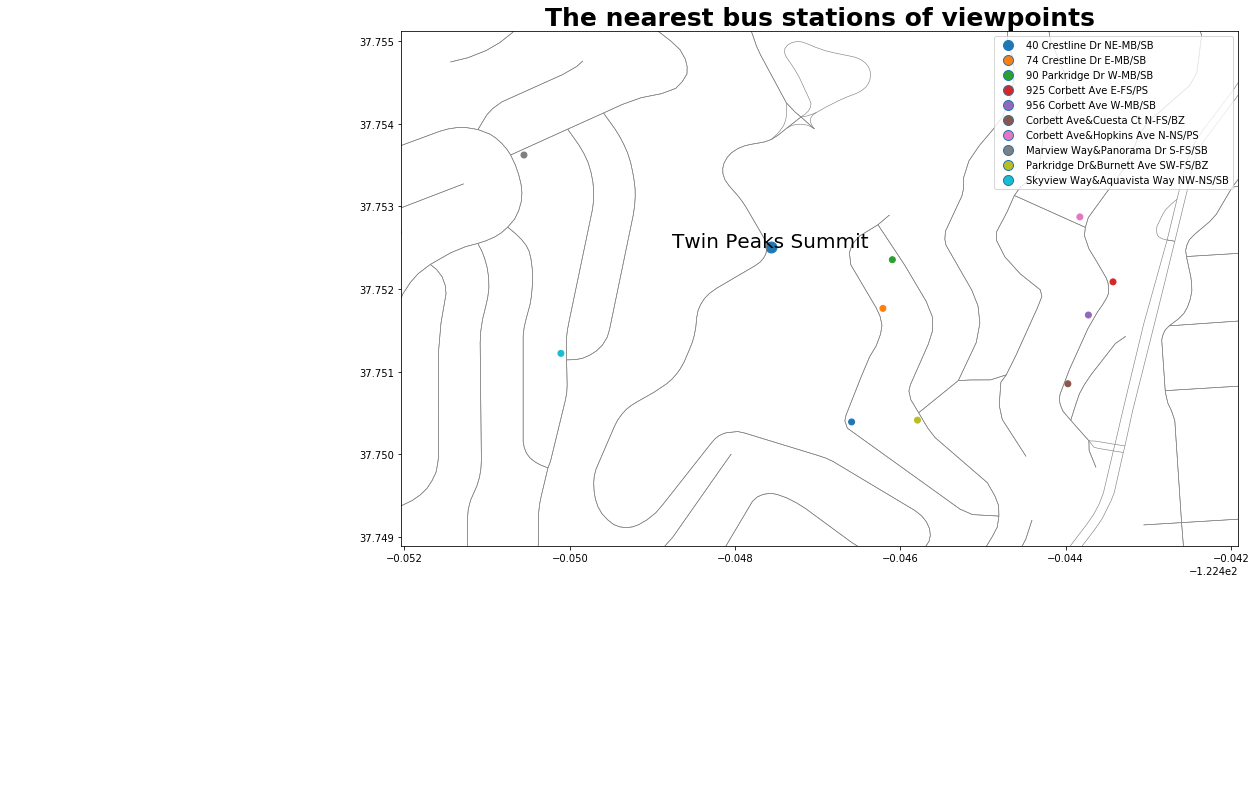

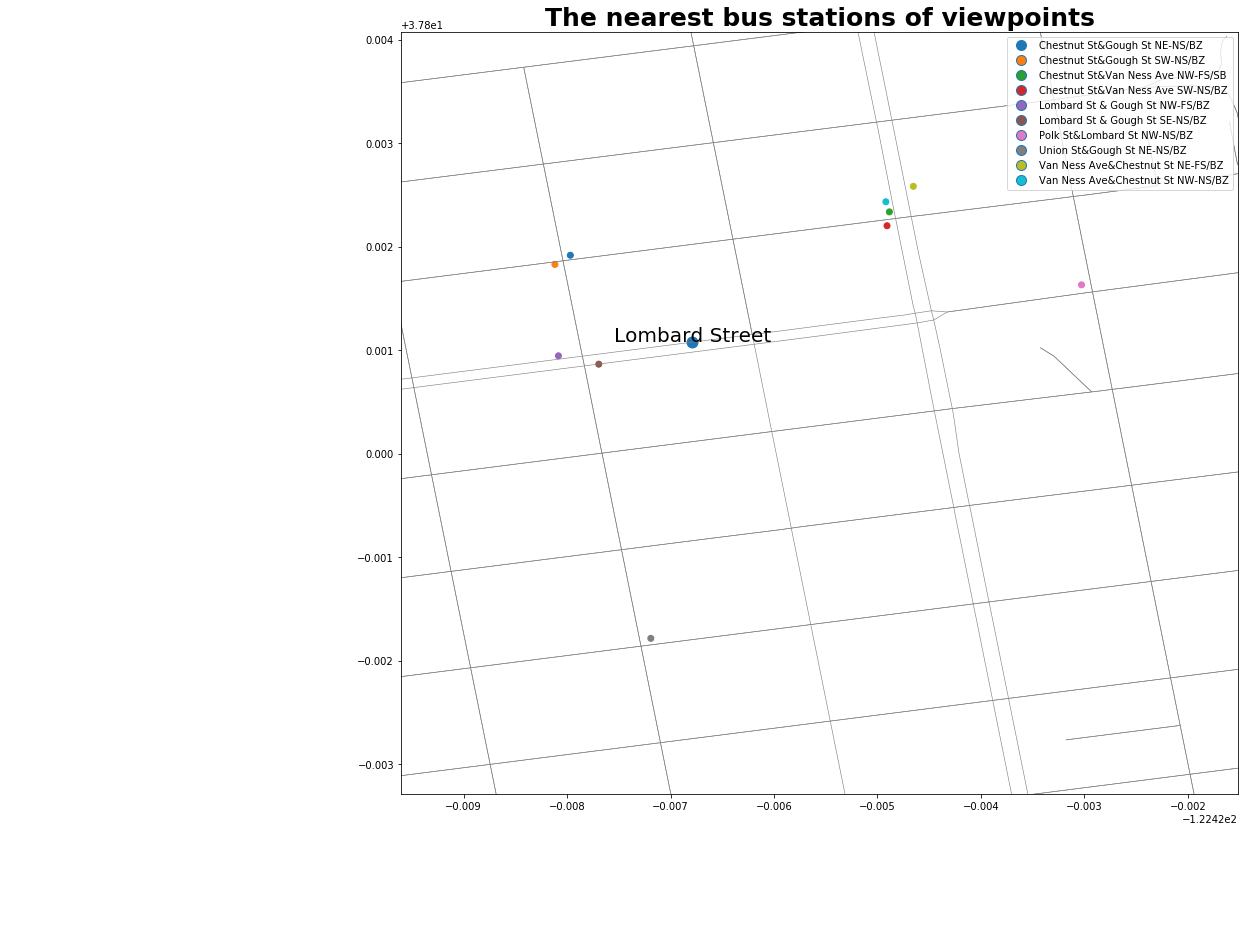

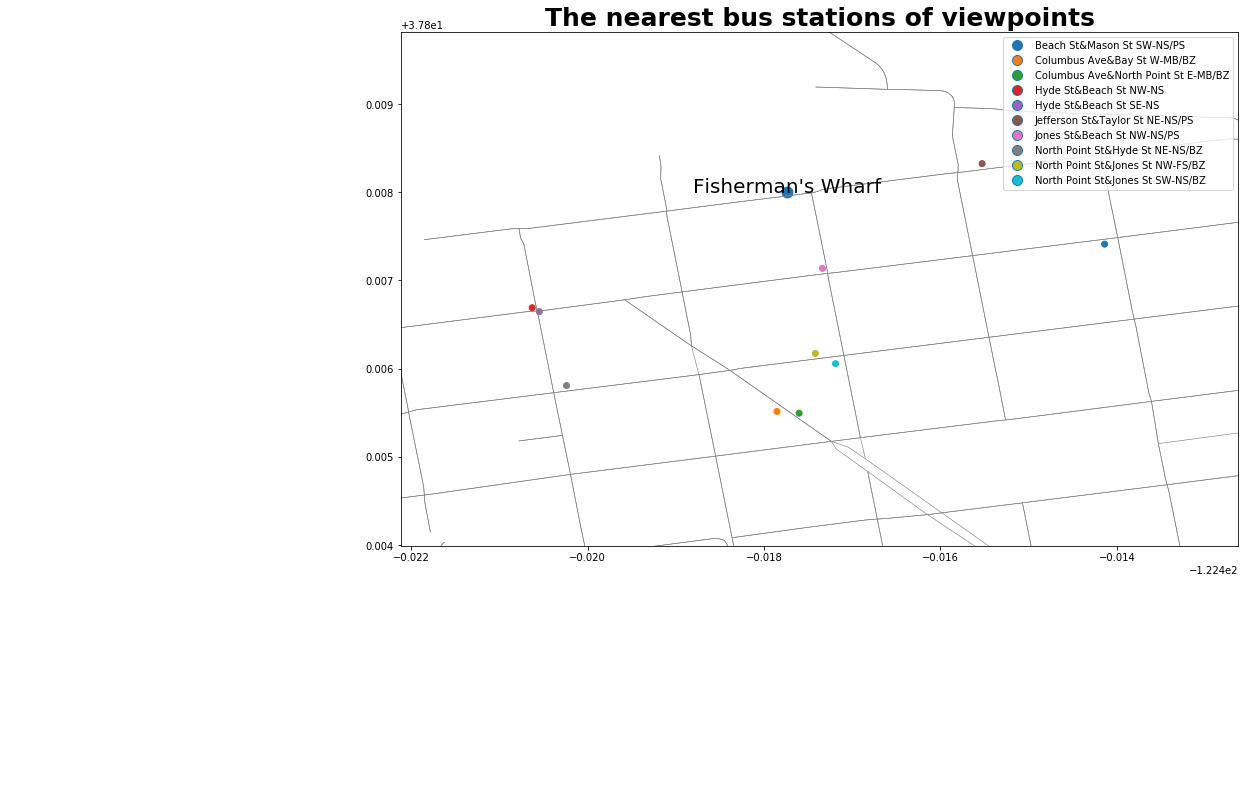

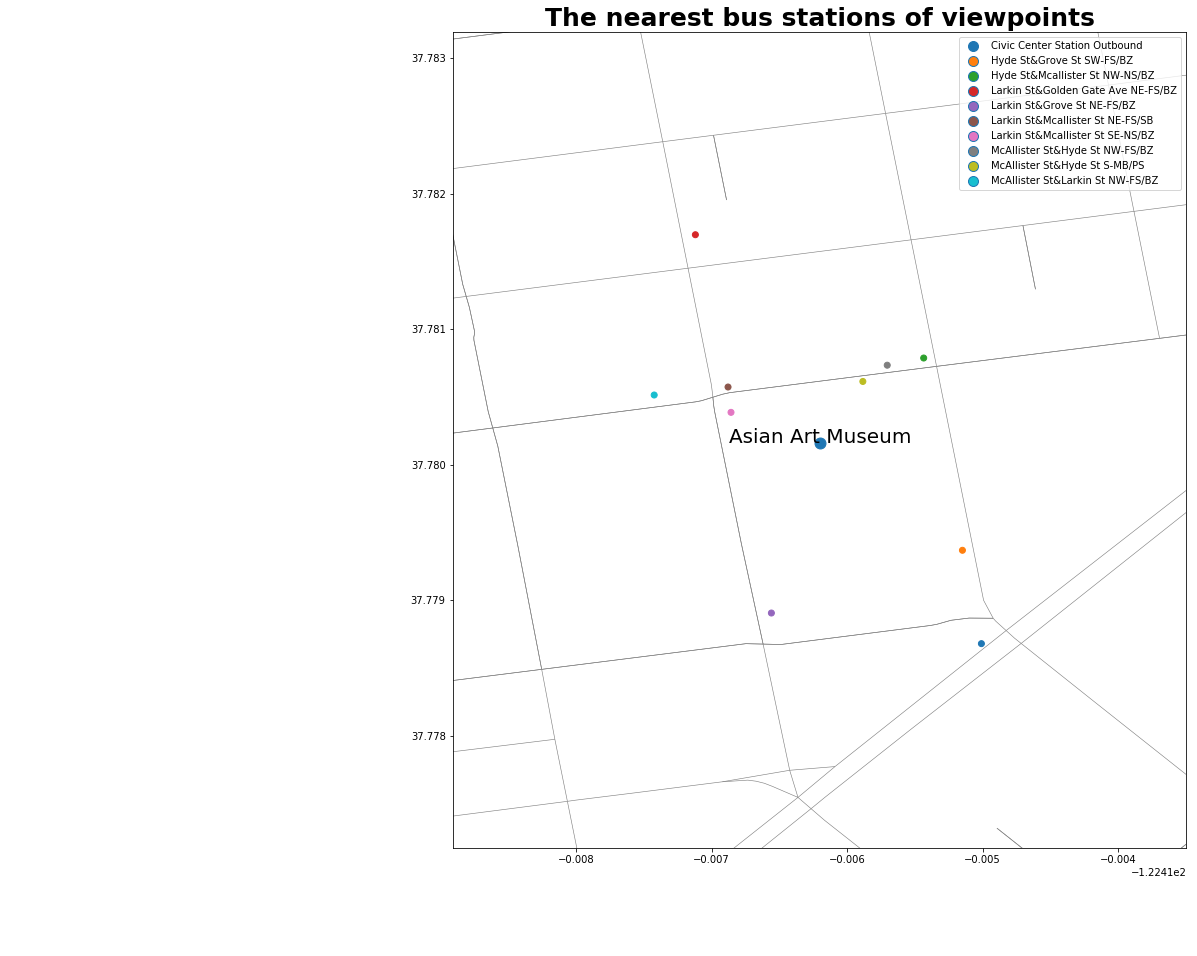

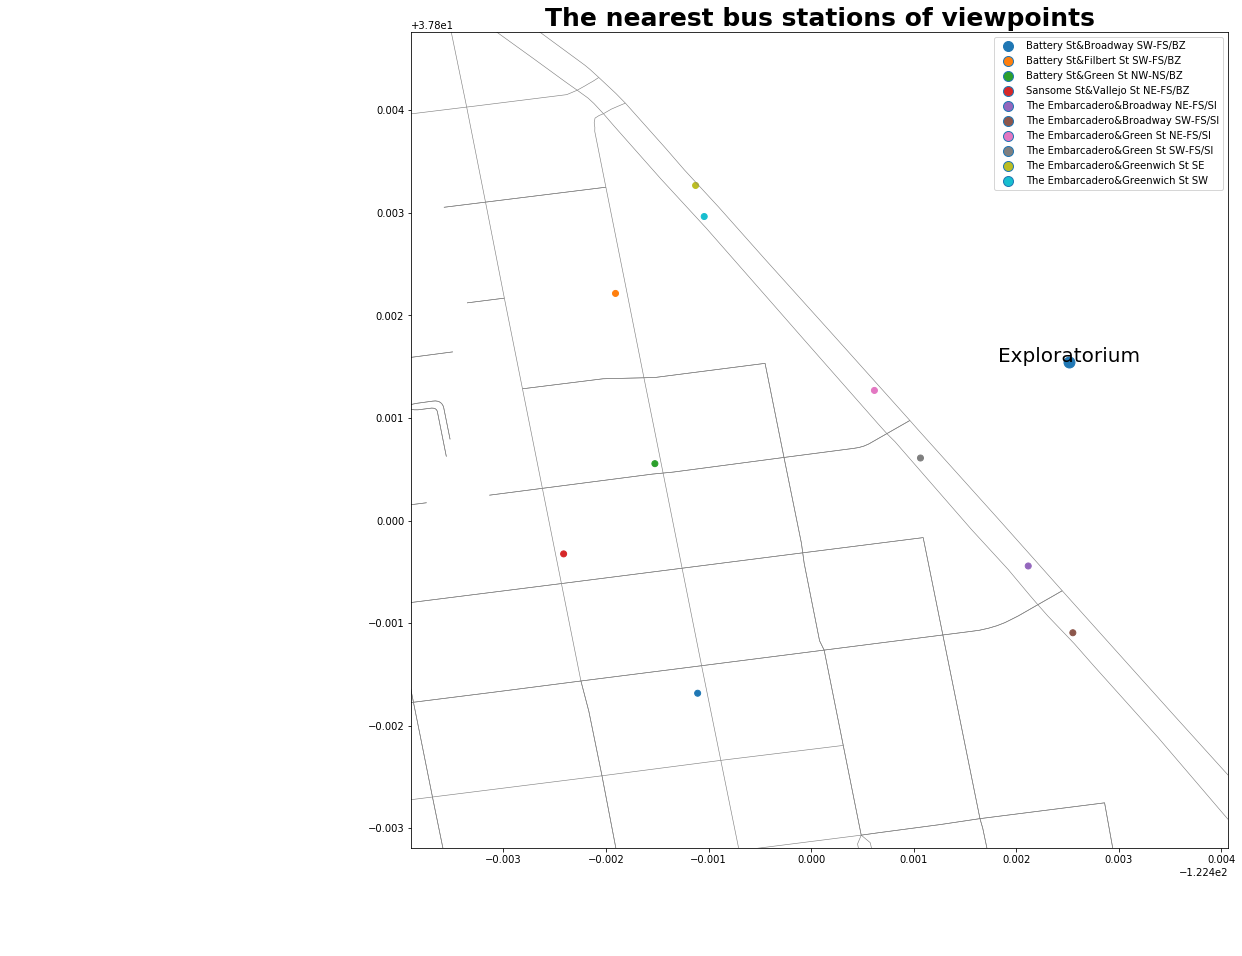

In [7]:
for i in range(len(scenic)):
   nearest_stop(scenic.iloc[i,:]) 

### Bus routes in San Francisco 

In [5]:
route = gpd.read_file("MUNI Simple Transit Routes/geo_export_362223ac-5e4a-4776-9e9a-bb464344da7c.shp")            
route = route.iloc[:,[5,12,18]]

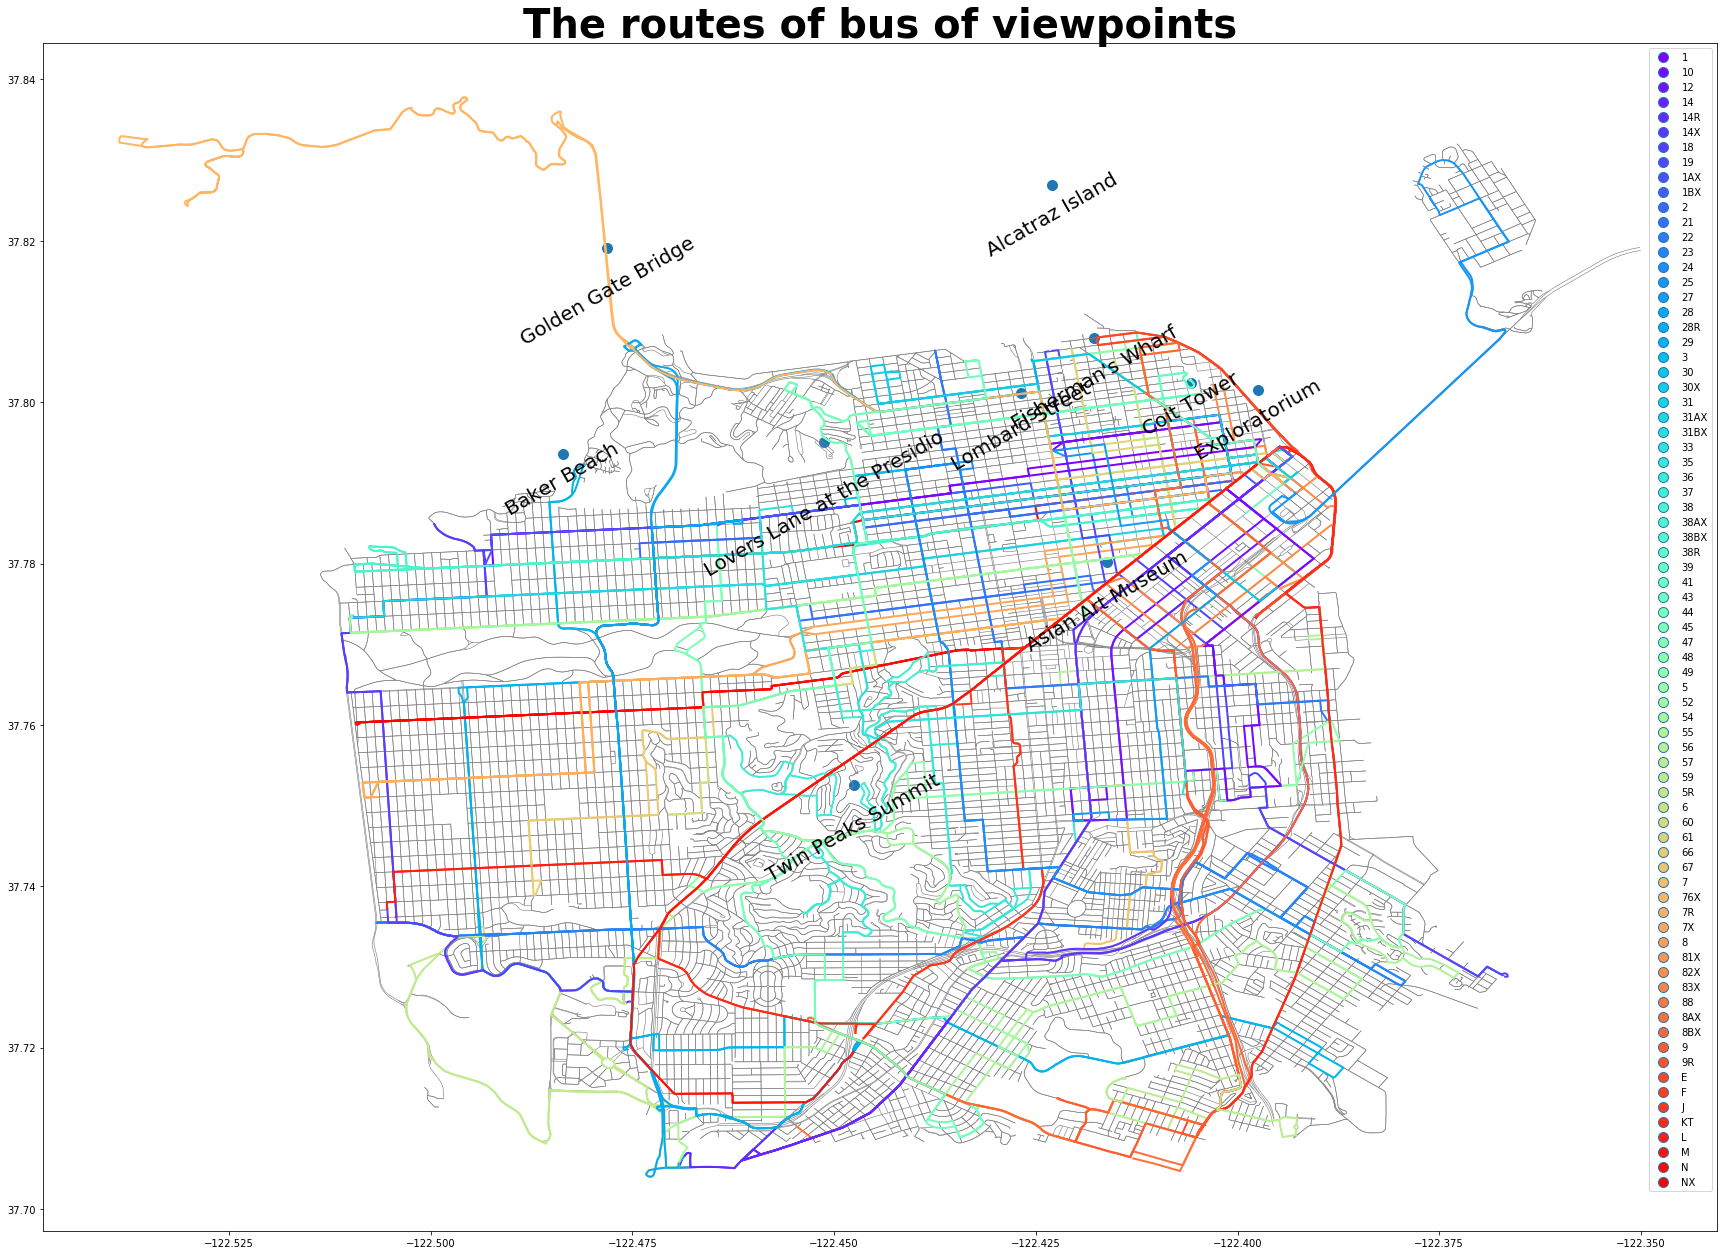

In [9]:
sanfranplot = edges.plot(color = 'grey',linewidth = 0.6, figsize = (30,30))
sanfranplot.set_title('The routes of bus of viewpoints', fontsize=40, fontweight='bold')
    #nearestplot = nearestgpd.plot(ax = sanfranplot, markersize = 8 )
routeplot = route.plot(ax = sanfranplot,column = 'route_name',linewidth = 2, cmap = 'rainbow',alpha = 1,legend = True)
scenicplot = scenic.plot(ax = sanfranplot, markersize = 100)
for i in range(len(location)):
        sanfranplot.annotate(scenic.iloc[i,0], xy = location[i], horizontalalignment = "center", fontsize=20,  rotation=30)

### Bus stations and routes near viewpoints

In [12]:
def route_stop(data):
    lat1 = data[1]
    lon1 = data[2]
    distance = []
    for i in range(len(stop)):
        lat2 = stop.iloc[i,2]
        lon2 = stop.iloc[i,3]
        dis = haversine_np(lon1, lat1, lon2, lat2)
        distance.append(dis)
    stopdis = pd.DataFrame(columns = ['stop', 'dist','geometry','latitude','longitude'])
    stopdis['stop'] = stop['stopname']
    stopdis['geometry'] = stop['geometry']
    stopdis['dist'] = distance
    stopdis['latitude'] = stop['latitude']
    stopdis['longitude'] = stop['longitude']
    nearest  = stopdis.sort_values(by = 'dist', ascending = True)[0:10]
    nearestgpd = gpd.GeoDataFrame(nearest, geometry = nearest['geometry'])
    name = nearest['stop']
    nearestlocation = [(x) for x in zip(nearest.longitude, nearest.latitude)]
    sanfranplot = edges.plot(color = 'grey',linewidth = 0.6, figsize = (15,15))
    sanfranplot.set_title('The nearest bus stations of viewpoints', fontsize=25, fontweight='bold')
    #nearestplot = nearestgpd.plot(ax = sanfranplot, markersize = 8 )
    nearestplot = nearestgpd.plot(ax = sanfranplot,column = 'stop', alpha = 1,legend = True)
    #routeplot.legend(loc = 'center left', bbox_to_anchor = (0.2,1.12), ncol = 3)
    scenicplot = scenic.plot(ax = sanfranplot, markersize = 120)
    routeplot = route.plot(ax = sanfranplot,column = 'route_name',linewidth = 2, cmap = 'rainbow',alpha = 1)

    xmax = min((max(nearest.longitude)),-122.32)
    xmin = max((min(nearest.longitude)),-122.53)
    ymax = min((max(nearest.latitude)),37.84)
    ymin = max((min(nearest.latitude)),37.7)
    sanfranplot.set_xlim([xmin-0.0015, xmax+0.0015])
    sanfranplot.set_ylim([ymin-0.0015, ymax+0.0015])
    #sanfranplot.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    for i in range(len(location)):
        sanfranplot.annotate(scenic.iloc[i,0], xy = location[i], horizontalalignment = "center", fontsize=20,  rotation=0)
        # Call add_label() on each row.
    #for i in range(len(nearestlocation)):
     #   sanfranplot.annotate(nearest.iloc[i,0], xy = nearestlocation[i], horizontalalignment = "center", fontsize=8,  rotation=30)
    plt.show()

#### Bus stations and routes near Lovers' Lane at the Presidio

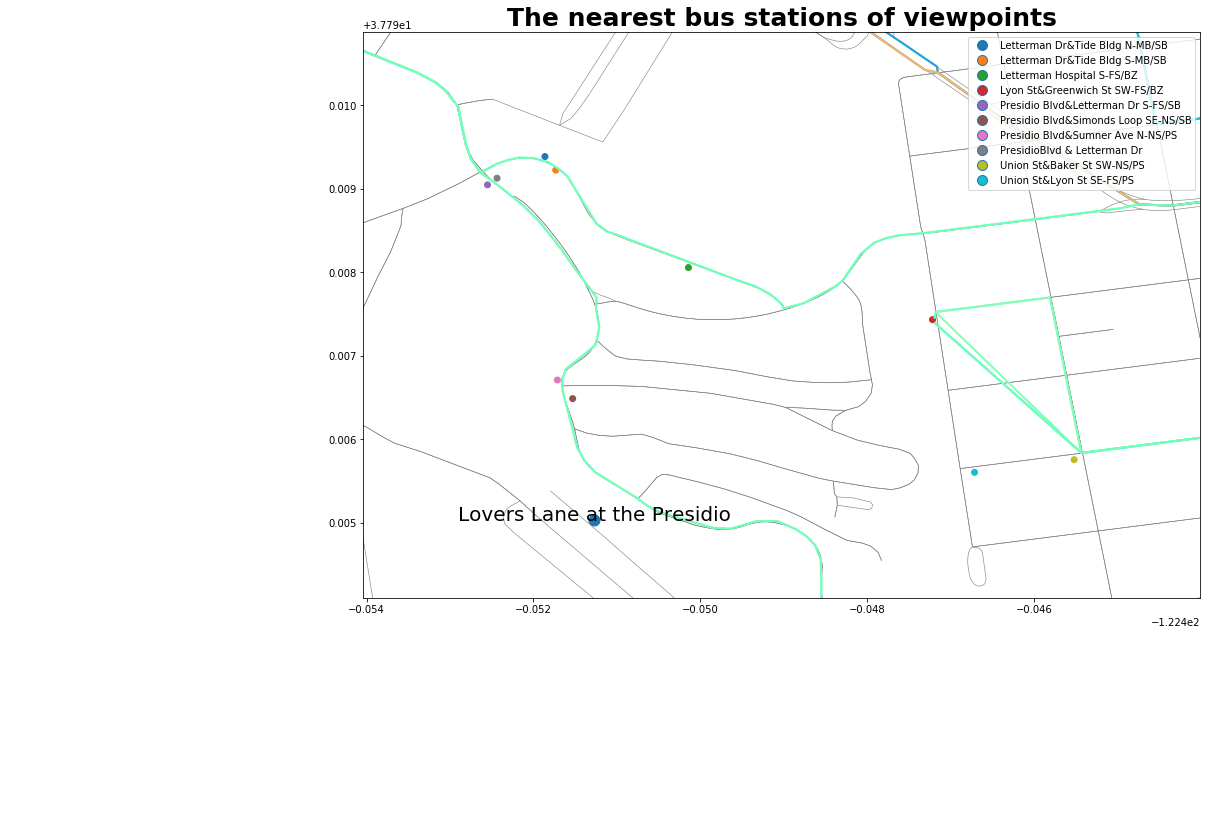

In [13]:
route_stop(scenic.iloc[0,:])

#### Bus stations and routes near Golden Gate Bridge

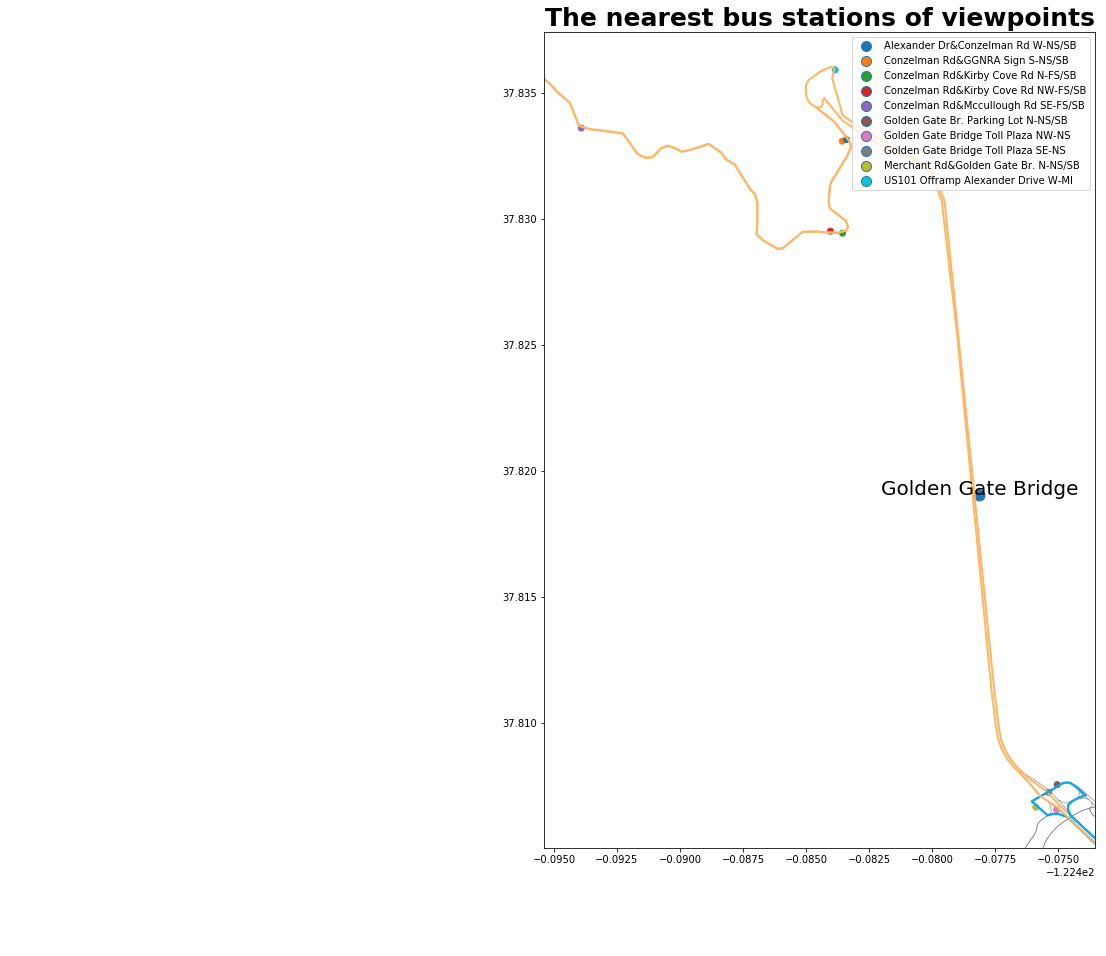

In [14]:
route_stop(scenic.iloc[1,:])

#### Bus stations and routes near Coit Tower

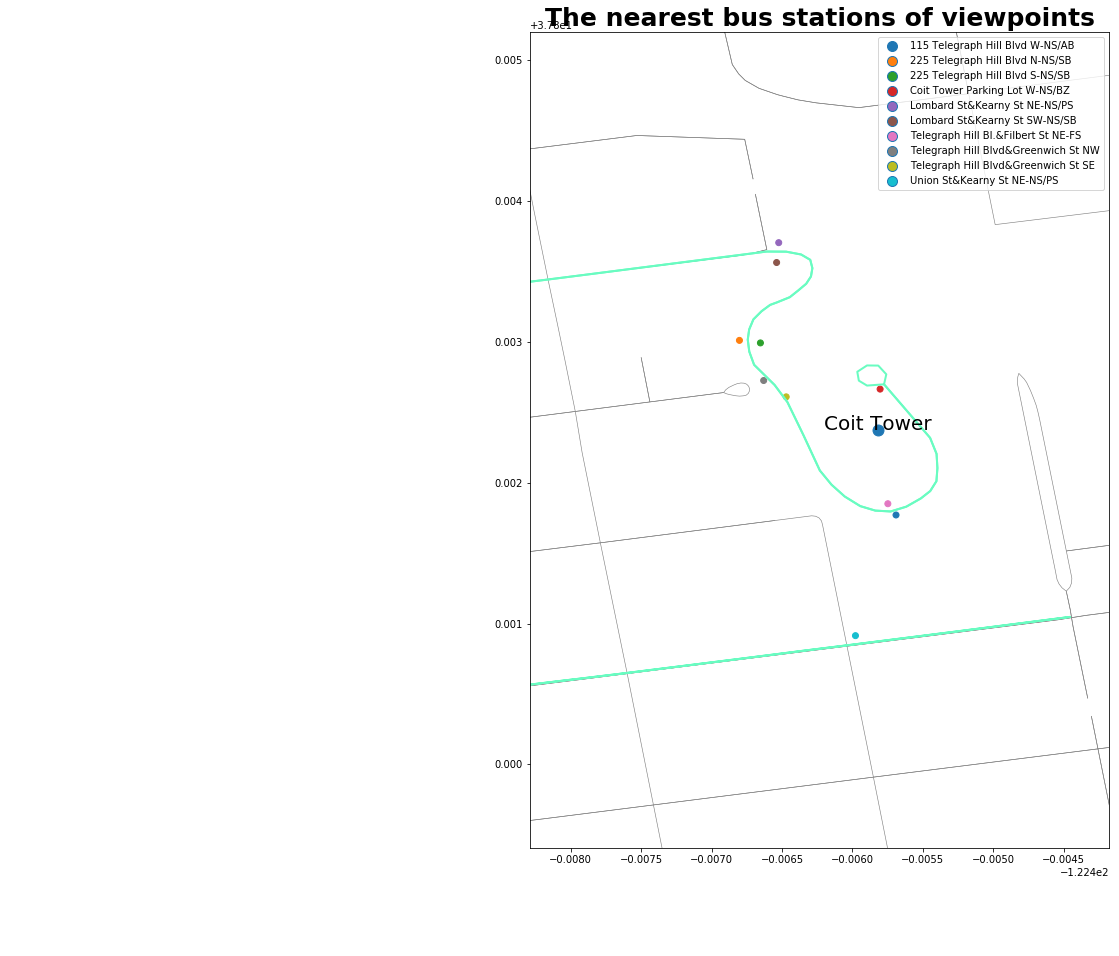

In [15]:
route_stop(scenic.iloc[2,:])

#### Bus stations and routes near Alcatraz Island

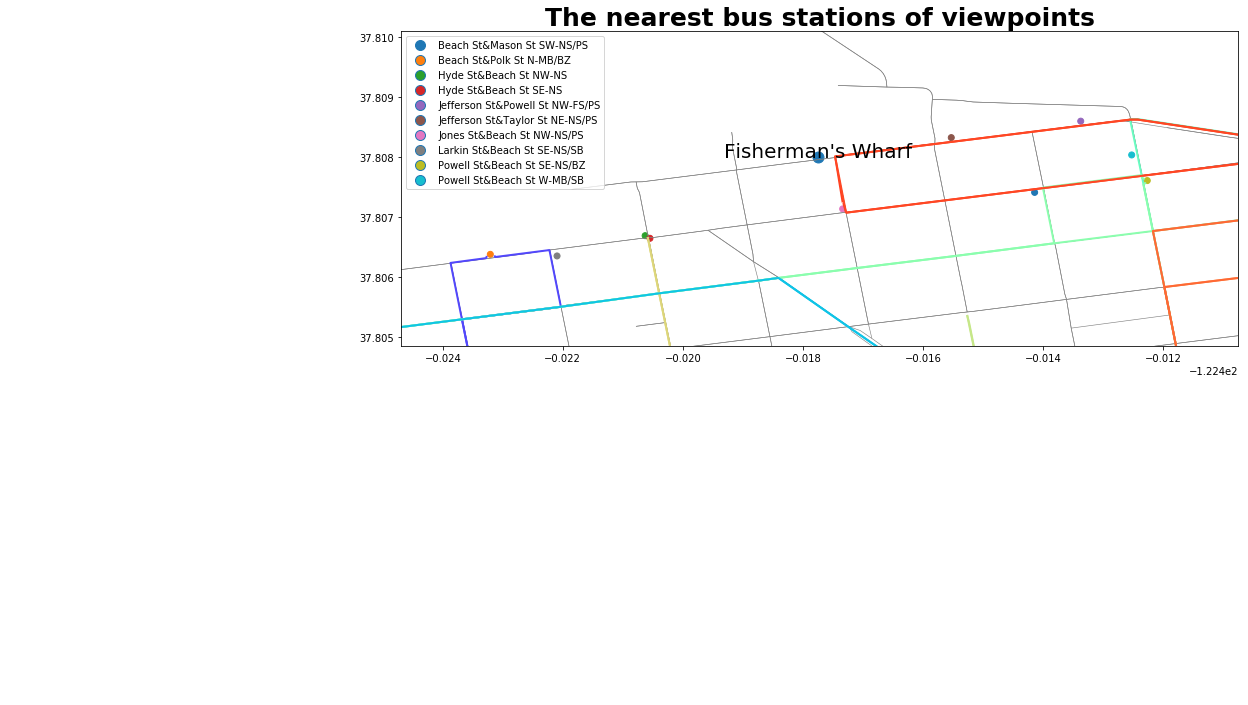

In [14]:
route_stop(scenic.iloc[3,:])

#### Bus stations  and routes near Baker Beach

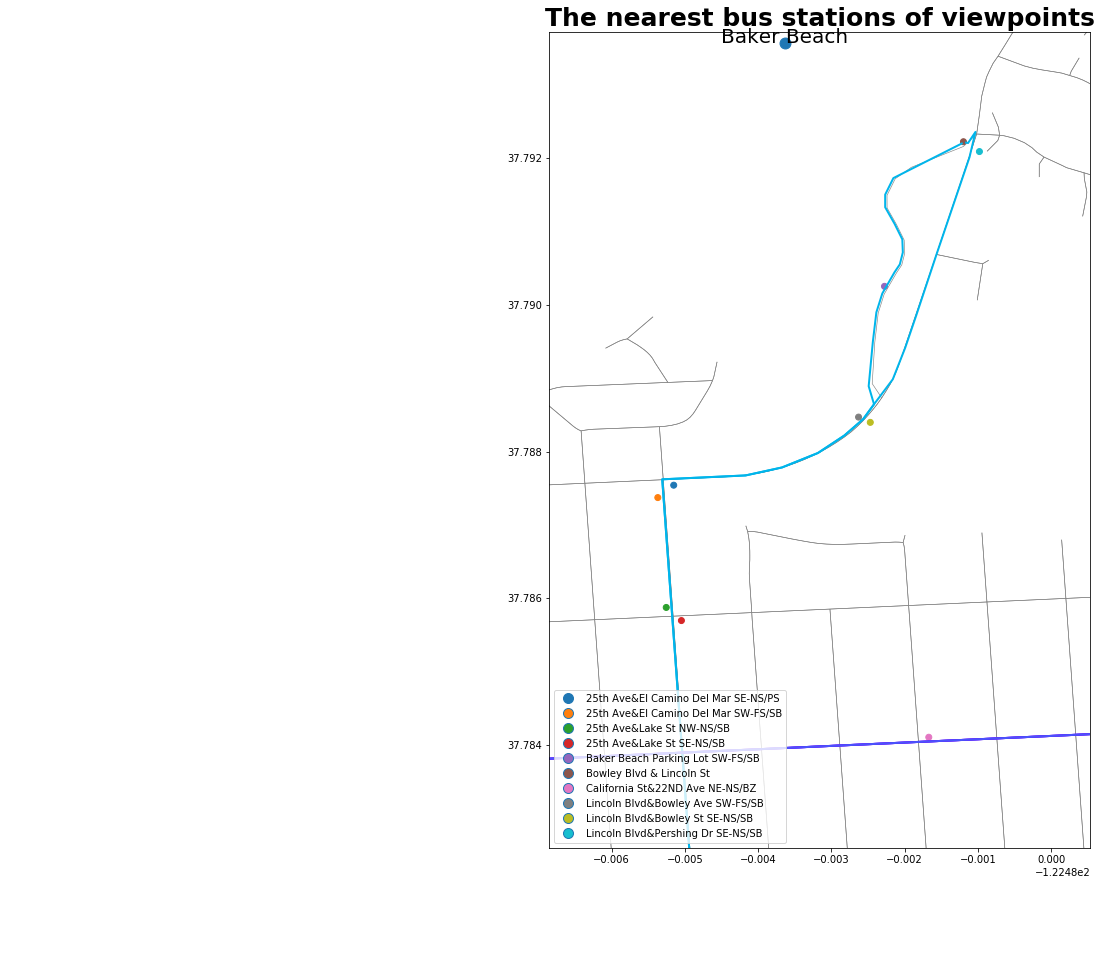

In [15]:
route_stop(scenic.iloc[4,:])

#### Bus stations  and routes near Twin Peaks Summit

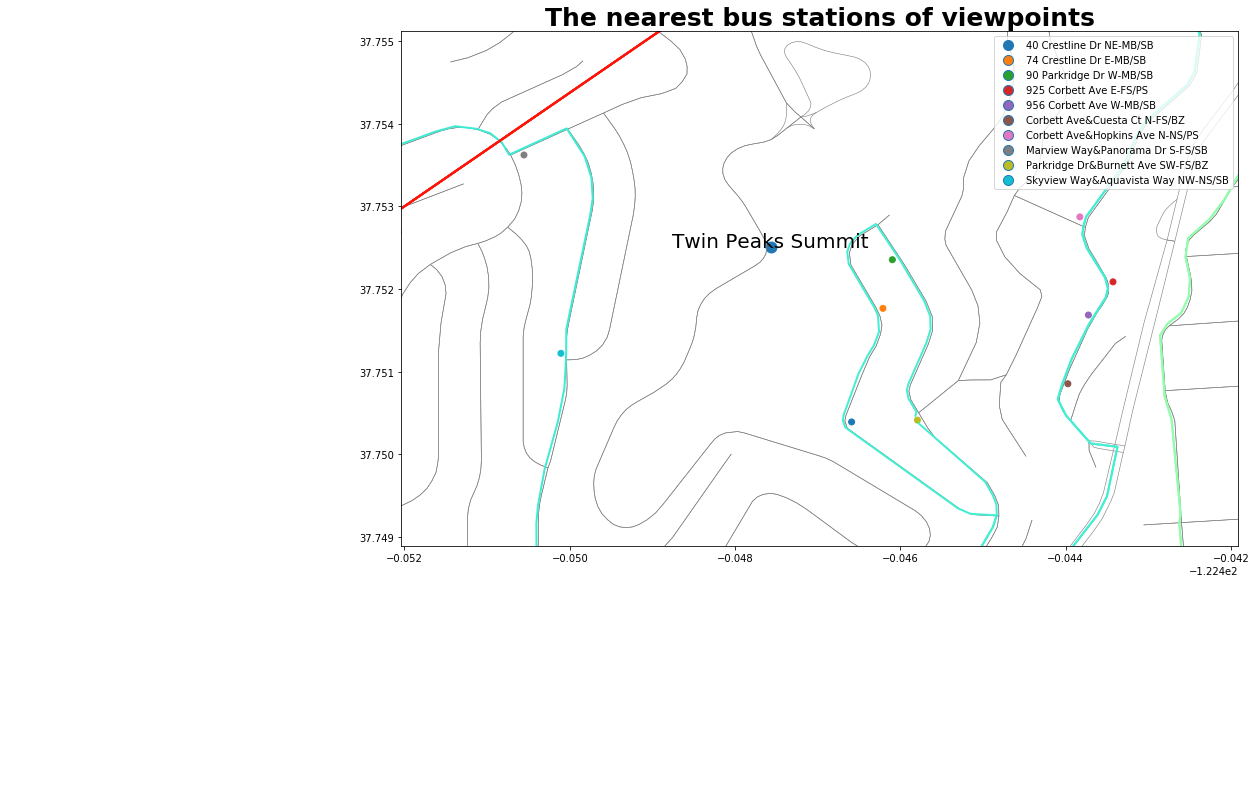

In [16]:
route_stop(scenic.iloc[5,:])

#### Bus stations  and routes near Lombard Street

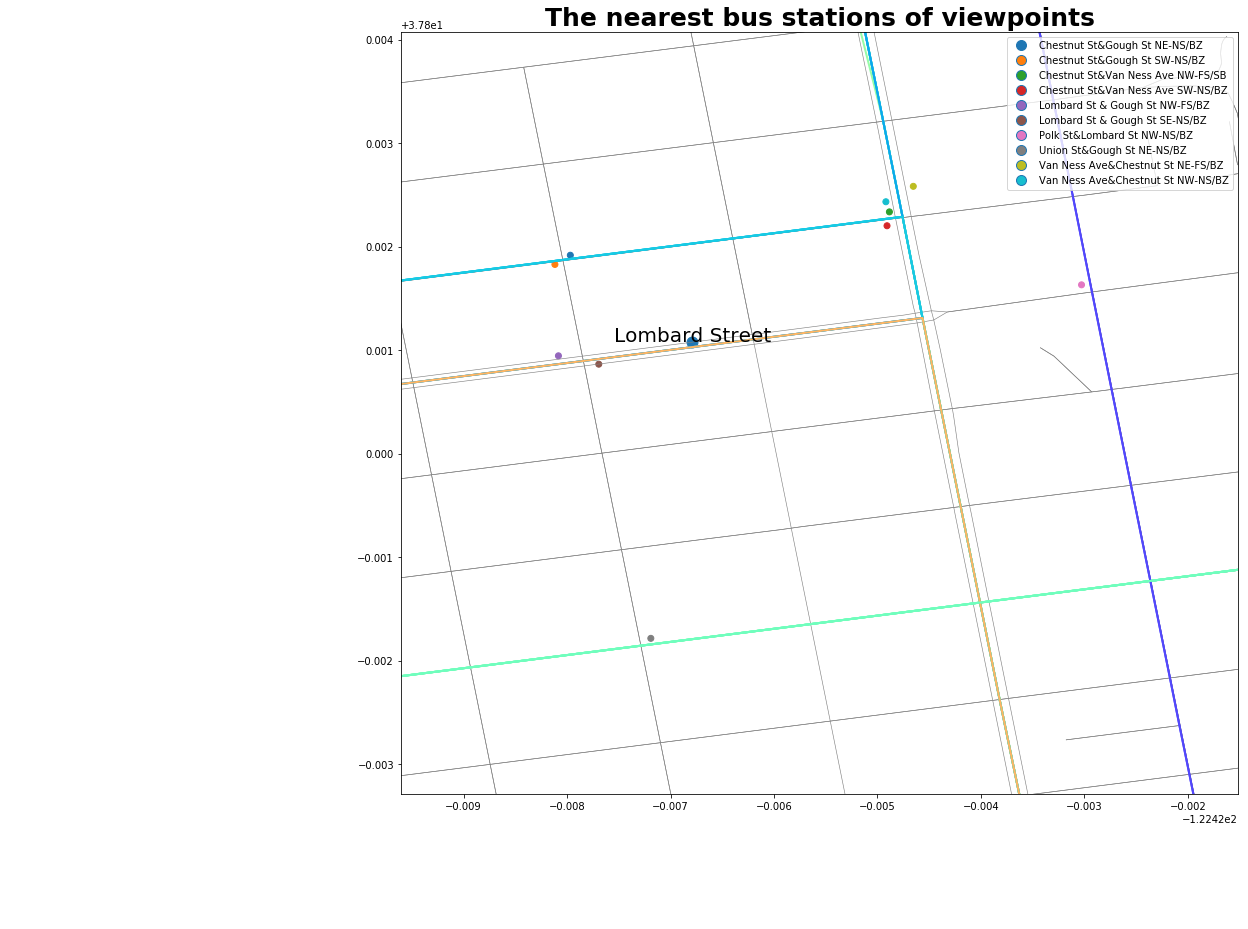

In [17]:
route_stop(scenic.iloc[6,:])

#### Bus stations  and routes near Fisherman's Wharf

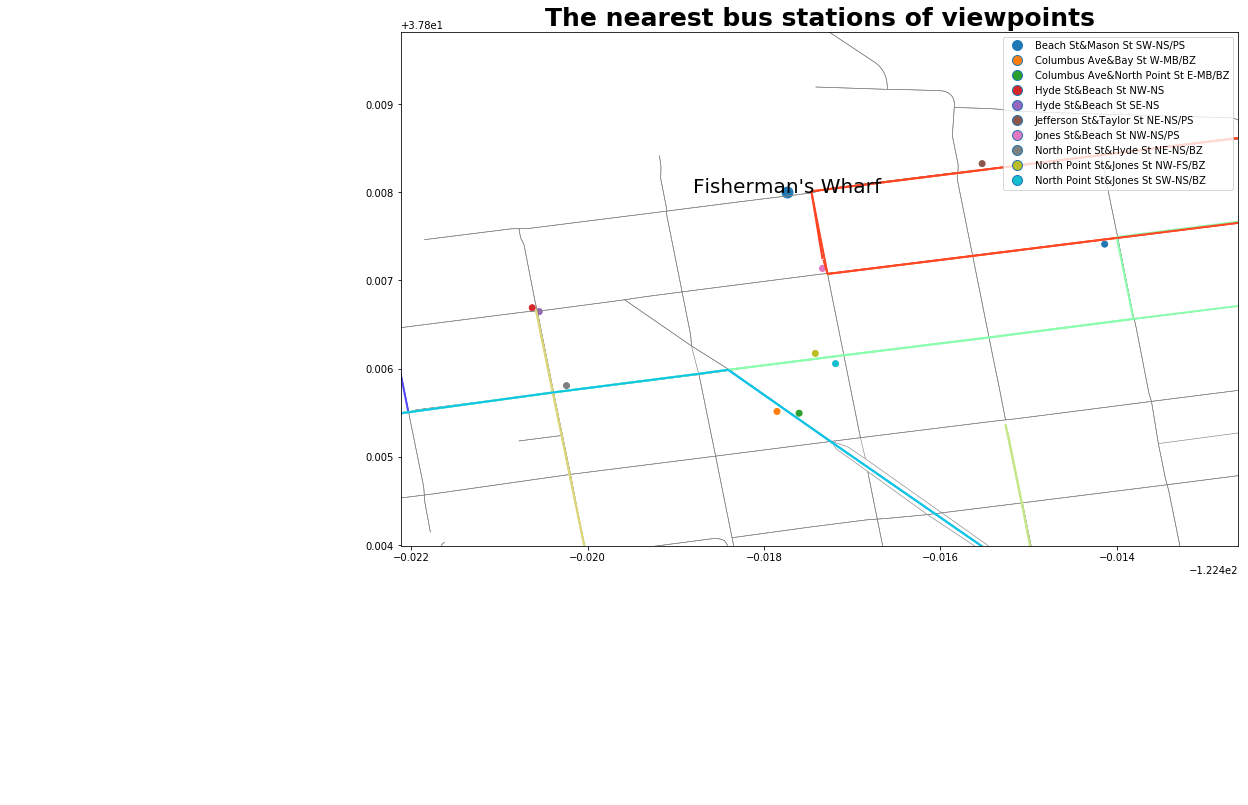

In [18]:
route_stop(scenic.iloc[7,:])

#### Bus stations  and routes near Asian Art Museum

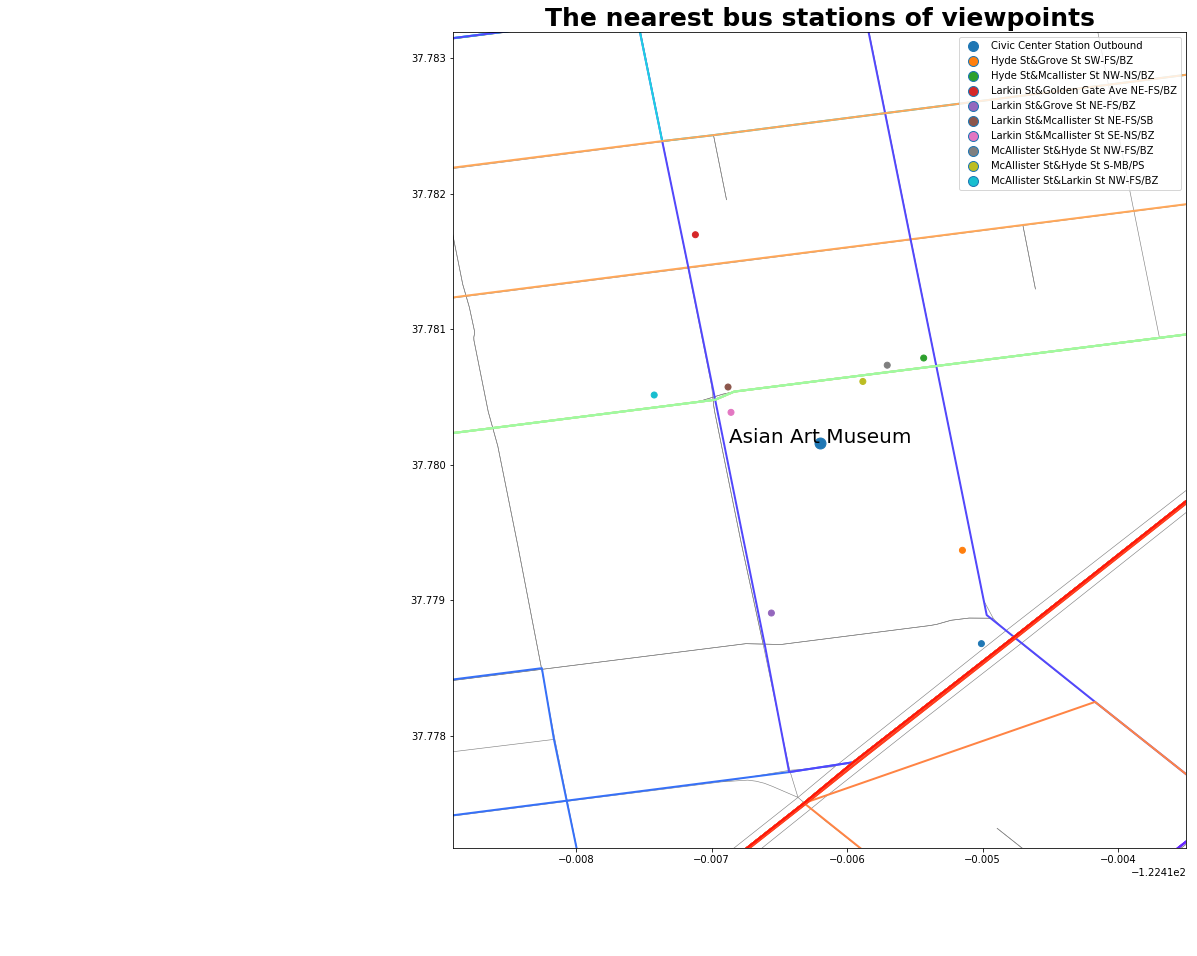

In [19]:
route_stop(scenic.iloc[8,:])

#### Bus stations  and routes near Exploratorium

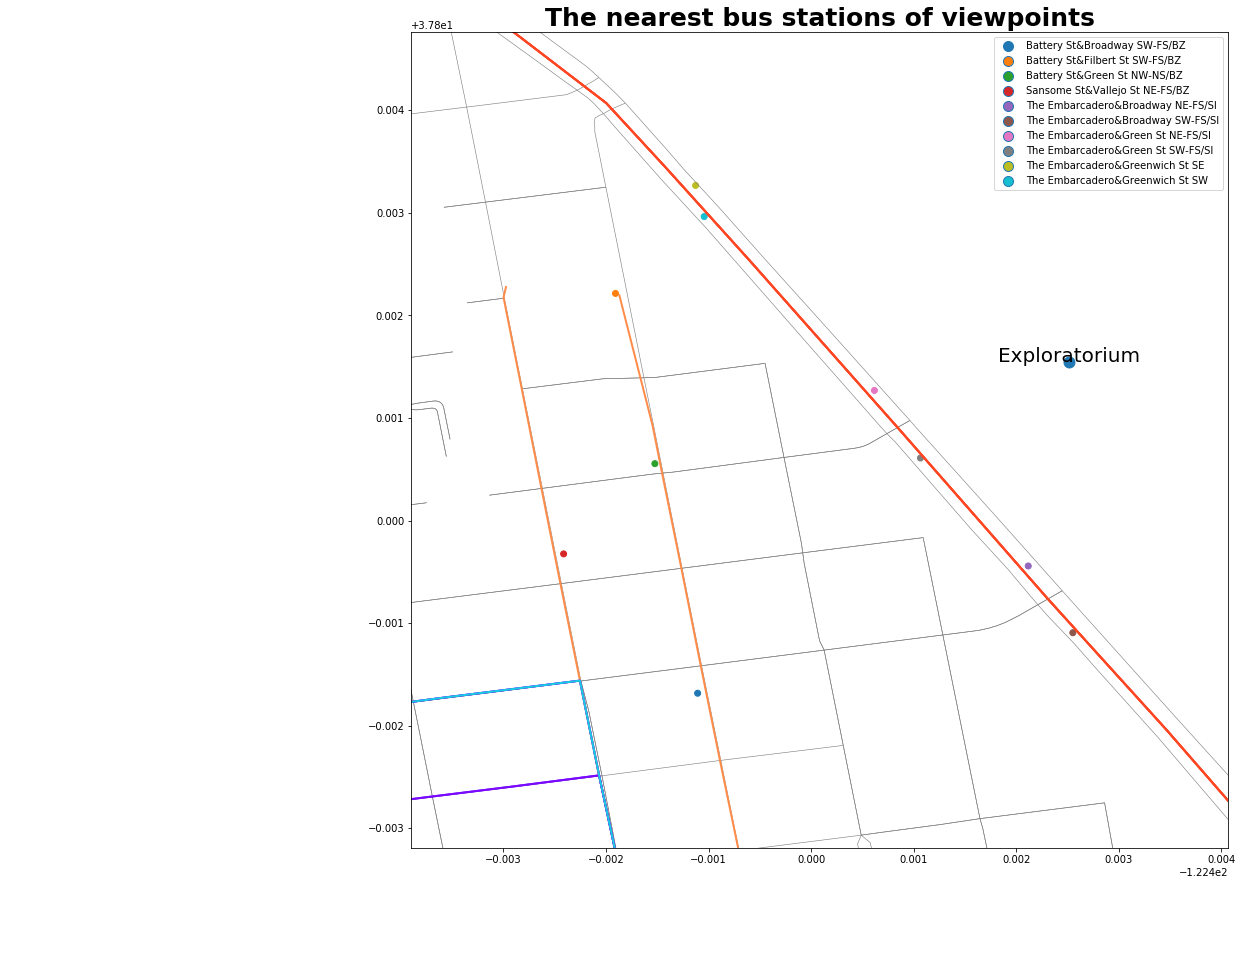

In [20]:
route_stop(scenic.iloc[9,:])

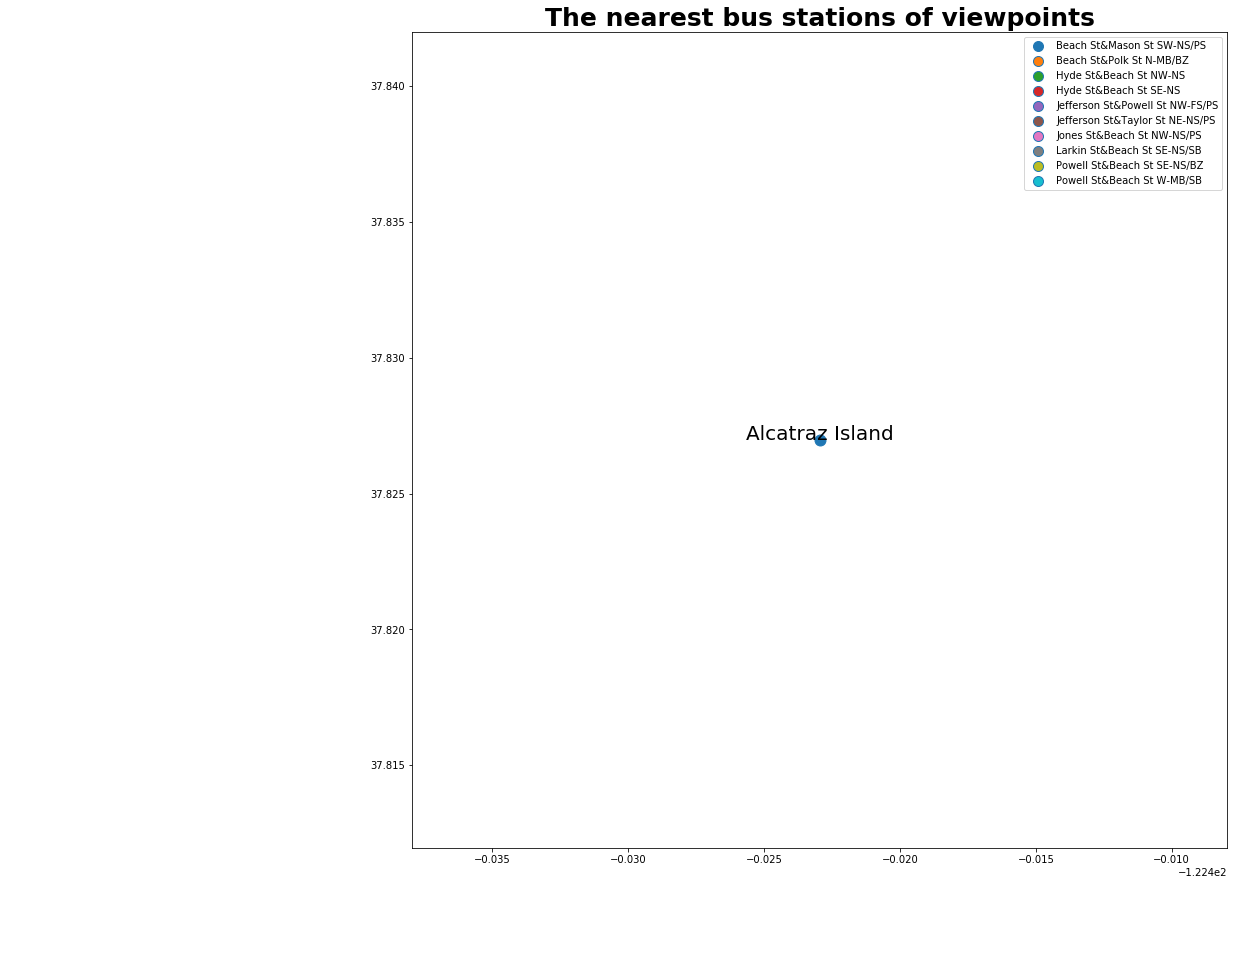

In [24]:

lat1 = scenic.iloc[3,1]
lon1 = scenic.iloc[3,2]
distance = []
for i in range(len(stop)):
    lat2 = stop.iloc[i,2]
    lon2 = stop.iloc[i,3]
    dis = haversine_np(lon1, lat1, lon2, lat2)
    distance.append(dis)
stopdis = pd.DataFrame(columns = ['stop', 'dist','geometry','latitude','longitude'])
stopdis['stop'] = stop['stopname']
stopdis['geometry'] = stop['geometry']
stopdis['dist'] = distance
stopdis['latitude'] = stop['latitude']
stopdis['longitude'] = stop['longitude']
nearest  = stopdis.sort_values(by = 'dist', ascending = True)[0:10]
nearestgpd = gpd.GeoDataFrame(nearest, geometry = nearest['geometry'])

sanfranplot = edges.plot(color = 'grey',linewidth = 0.6, figsize = (15,15))
sanfranplot.set_title('The nearest bus stations of viewpoints', fontsize=25, fontweight='bold')
   
nearestplot = nearestgpd.plot(ax = sanfranplot,column = 'stop', alpha = 1,legend = True)
    
scenicplot = scenic.plot(ax = sanfranplot, markersize = 120)
routeplot = route.plot(ax = sanfranplot,column = 'route_name',linewidth = 2, cmap = 'rainbow',alpha = 1)

sanfranplot.set_xlim([lon1-0.015, lon1+0.015])
sanfranplot.set_ylim([lat1-0.015, lat1+0.015])
    
for i in range(len(location)):
    sanfranplot.annotate(scenic.iloc[i,0], xy = location[i], horizontalalignment = "center", fontsize=20,  rotation=0)
plt.show()